In [1]:
%%capture
%run 1.2-FeatureEngineering.ipynb

1. Importing libraries

In [230]:
import missingno as msno
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

2. Checking missing values

In [231]:
missing = train_df.isnull().sum()[train_df.isnull().sum() > 0].to_frame().rename(columns = {0: "No. of Missing Values"})
missing["% of Missing Values"] = round(train_df.isnull().sum()[train_df.isnull().sum() > 0] * 100 / len(train_df),2)
missing

,No. of Missing Values,% of Missing Values
HomePlanet,201,2.31
CryoSleep,217,2.50
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11
VRDeck,188,2.16


2. Visualizing missing values

<Axes: >

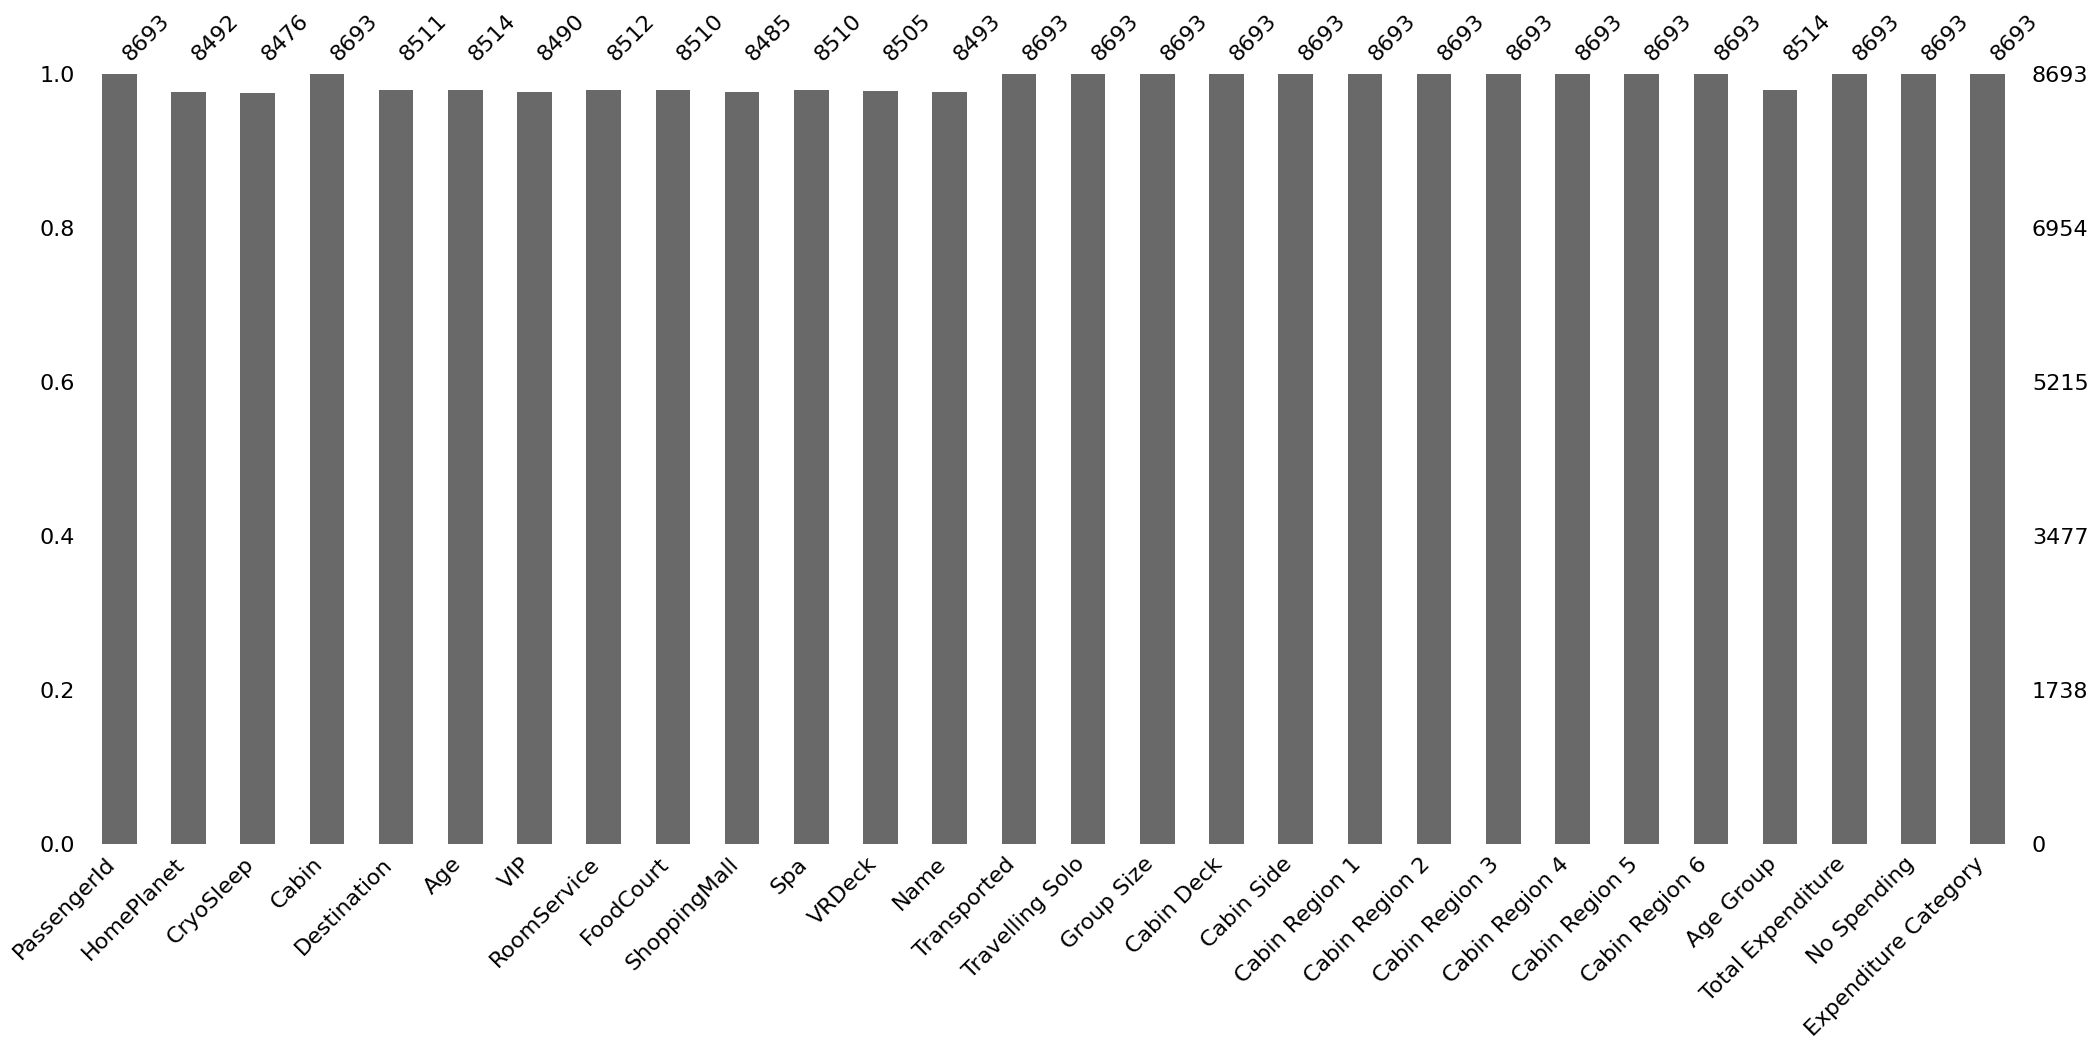

In [232]:
msno.bar(train_df)

3. Handling missing values

In [233]:
cat_cols = train_df.select_dtypes(include=["object", "bool"]).columns.tolist()
cat_cols.remove("Transported")
num_cols = train_df.select_dtypes(include=["int", "float"]).columns.tolist()

4. Using Simple Imputer Library to fill missing values

In [234]:
imputer1 = SimpleImputer(strategy = "most_frequent")
imputer2 = SimpleImputer(strategy = "median")

In [235]:
def fill_missingno(df):
    df[cat_cols] = imputer1.fit_transform(df[cat_cols])
    df[num_cols] = imputer2.fit_transform(df[num_cols])

In [236]:
fill_missingno(train_df)
fill_missingno(test_df)

In [237]:
print("Missing numbers left in train_df is:", train_df.isnull().sum().sum())
print("Missing numbers left in test_df is:", test_df.isnull().sum().sum())

Missing numbers left in train_df is: 0
Missing numbers left in test_df is: 0


5. Checking duplicity data

In [238]:
print("Duplicate values in training data is: ", train_df.duplicated().sum())
print("Duplicate values in testing data is: ", test_df.duplicated().sum())

Duplicate values in training data is:  0
Duplicate values in testing data is:  0


6. Checking Cardinality of Categorical Features

In [239]:
print("Cardinality of features in numerical data is:")
display(train_df.select_dtypes(include=["object"]).nunique().to_frame().rename(columns = {0: "Cardinality"}))
print("Cardinality of features in categorical data is:")
display(test_df.select_dtypes(include=["object"]).nunique().to_frame().rename(columns = {0: "Cardinality"}))


Cardinality of features in numerical data is:


,Cardinality
PassengerId,8693
HomePlanet,3
CryoSleep,2
Cabin,6561
Destination,3
VIP,2
Name,8473
Travelling Solo,2
Cabin Deck,8
Cabin Side,2


Cardinality of features in categorical data is:


,Cardinality
PassengerId,4277
HomePlanet,3
CryoSleep,2
Cabin,3266
Destination,3
VIP,2
Name,4176
Travelling Solo,2
Cabin Deck,8
Cabin Side,2


### ❕ Observations
We have done all feature engineering now we can drop features which have high cardinality. So we can drop passengerId, Cabin , Name , Group and Surname features.

In [240]:
# Extracting passengerId from test data because we need this for submitting our predictions on kaggle.
pass_df = test_df[["PassengerId"]]

7. Dropping features with high cardinality

In [241]:
cols = ["PassengerId", "Cabin", "Name"]
train_df.drop(columns = cols, inplace = True)
test_df.drop(columns = cols, inplace = True)

8. Gathering statistical information of numerical features.

In [242]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8693.0,28.790291,14.341404,0.0,20.0,27.0,37.0,79.0
RoomService,8693.0,220.009318,660.519050,0.0,0.0,0.0,41.0,14327.0
FoodCourt,8693.0,448.434027,1595.790627,0.0,0.0,0.0,61.0,29813.0
ShoppingMall,8693.0,169.572300,598.007164,0.0,0.0,0.0,22.0,23492.0
Spa,8693.0,304.588865,1125.562559,0.0,0.0,0.0,53.0,22408.0
VRDeck,8693.0,298.261820,1134.126417,0.0,0.0,0.0,40.0,24133.0
Group Size,8693.0,2.035546,1.596347,1.0,1.0,1.0,3.0,8.0
Total Expenditure,8693.0,1440.866329,2803.045694,0.0,0.0,716.0,1441.0,35987.0


### ❕ Observations
* We can observe that in RoomService, FoodCourt, ShoppingMall, Spa & VRDeck more than 50 percentile of data are equal to 0. And when we did EDA on this features all of them were having right skewed distribution, so we can simply say there is a presence of large amount of outliers in these features. 
To correct this, we can tranform these features to normal distribution using Log Transformation in order to have better understanding while finding patterns


9. Applying log transformation on expenditure features

In [243]:
cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Total Expenditure"]

for val in cols:
    train_df[val] = np.log(1 + train_df[val])
    test_df[val] = np.log(1 + test_df[val])

10. Visualizing these features after log transformation

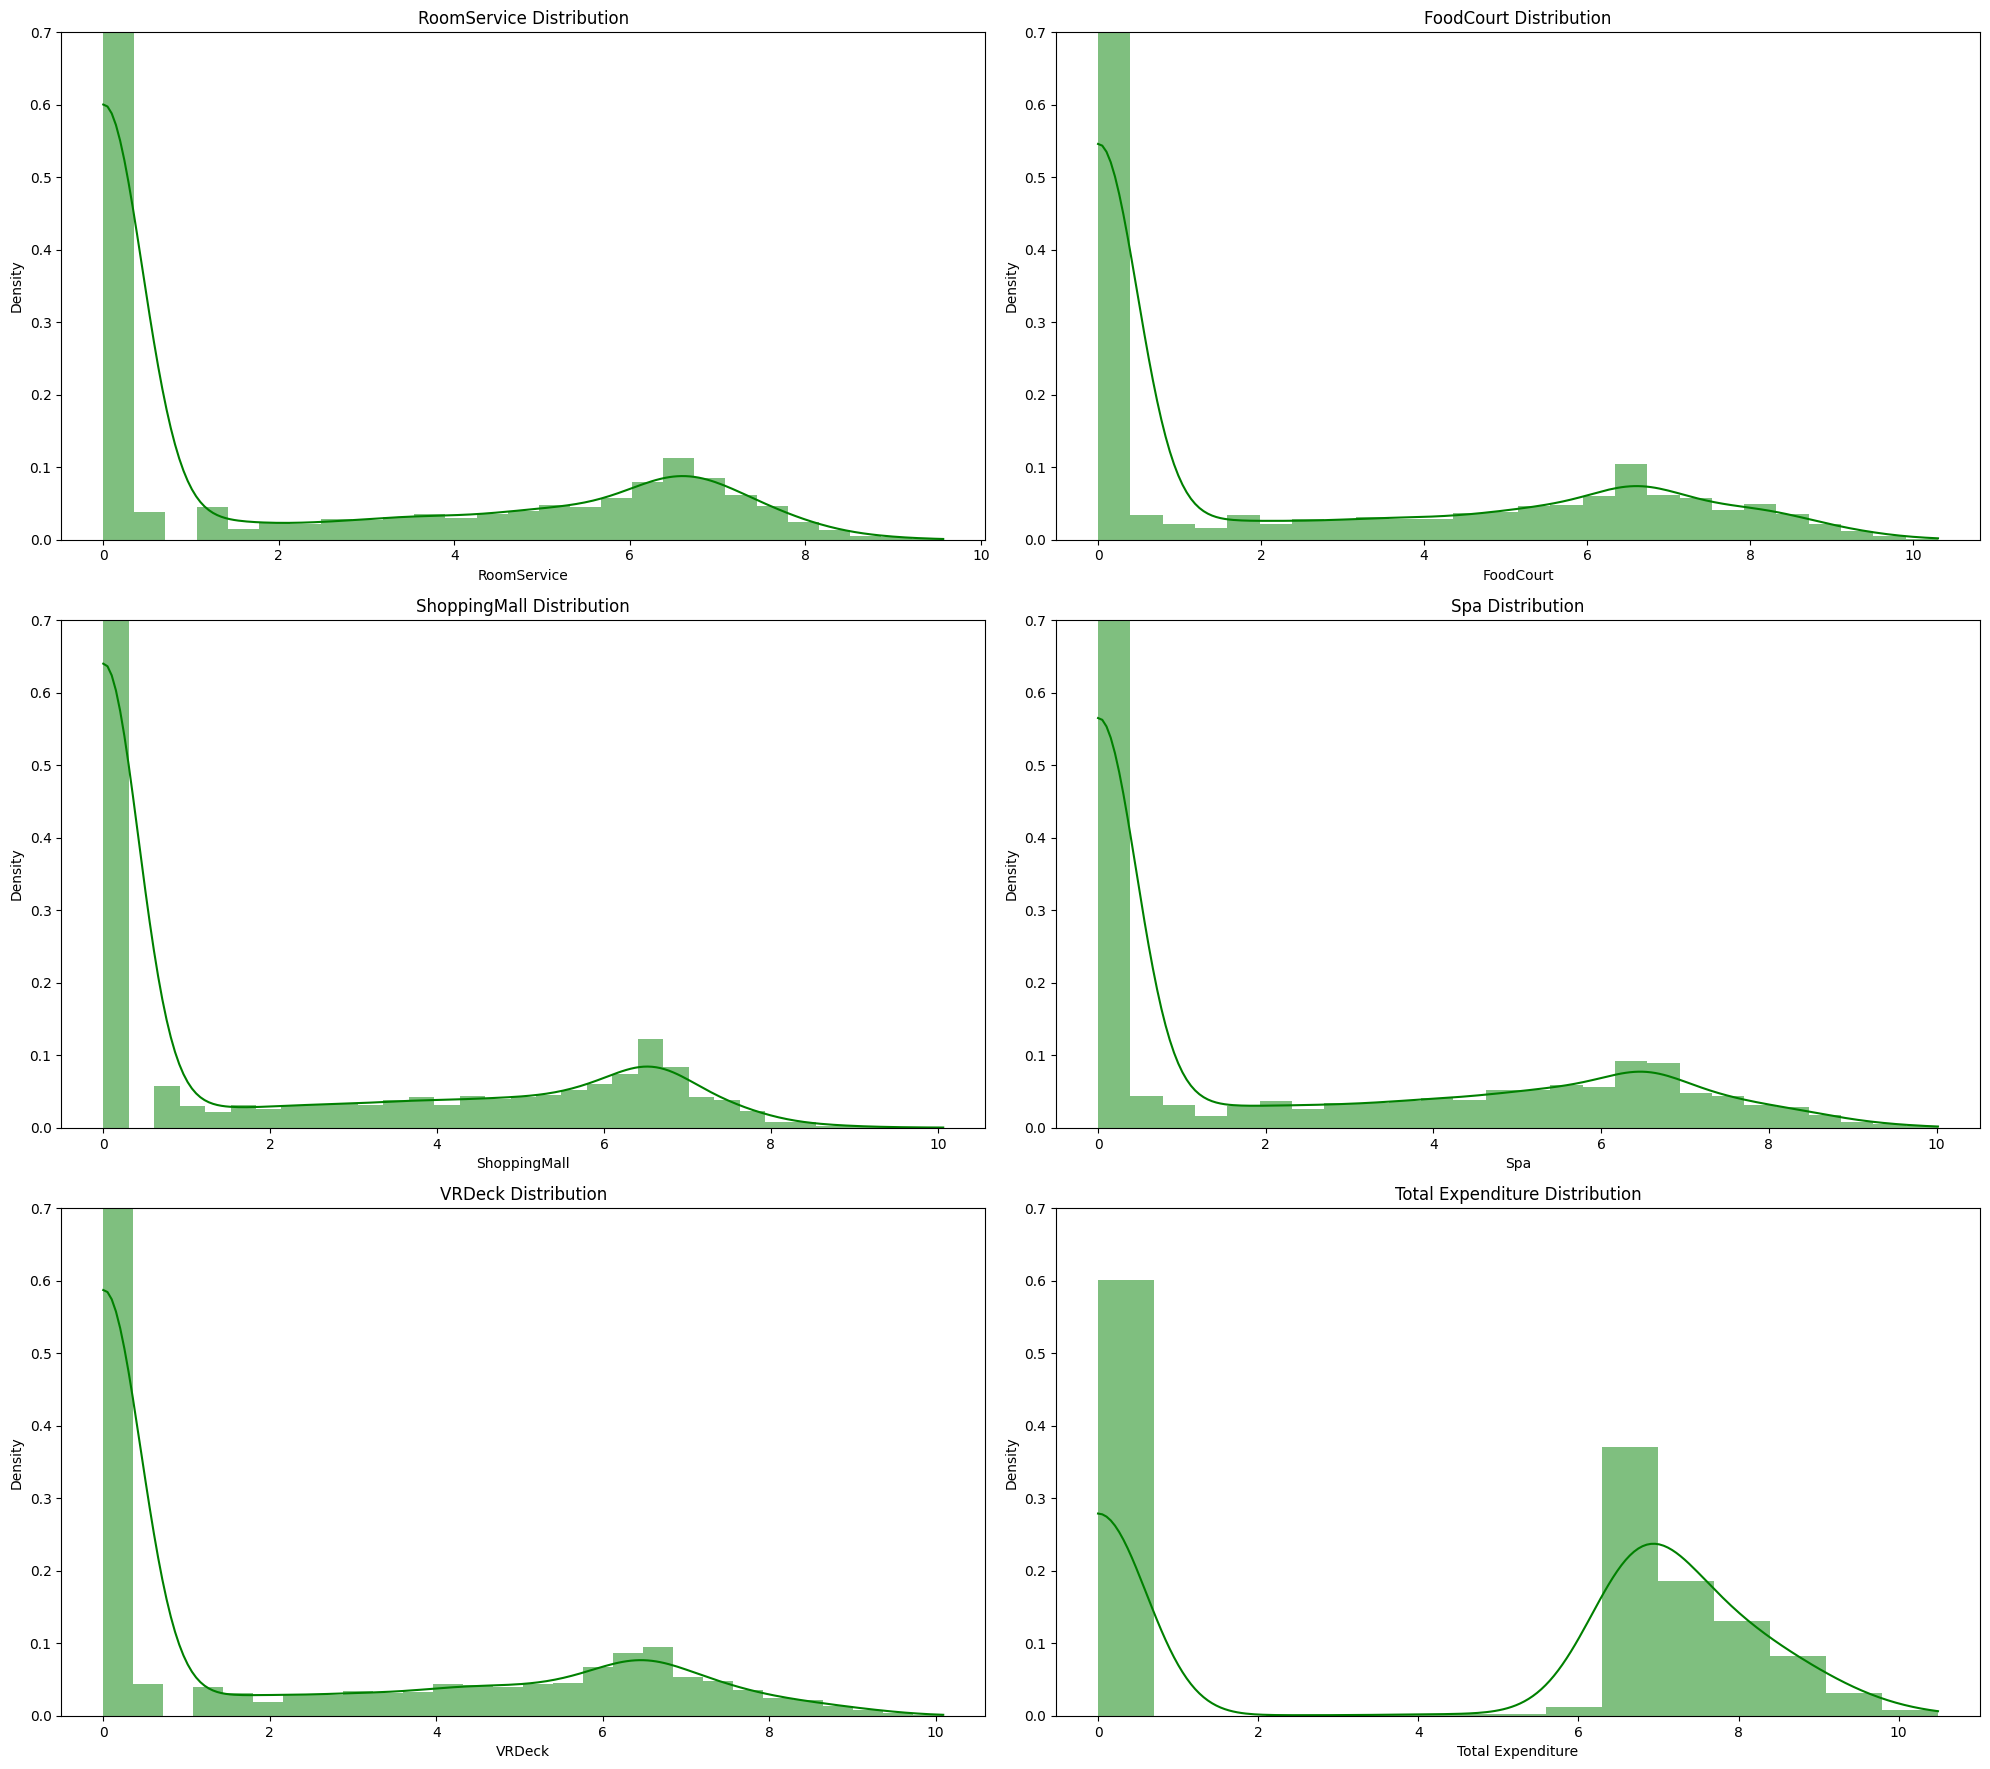

In [244]:
 # comment: distplot is deprecated in sns v0.14.0, so I used histplot and added kde, stat and linewidth instead
plt.figure(figsize = (20, 35))
for i, val in enumerate(cols):
    plt.subplot(6, 2, i + 1)
    sns.histplot(train_df[val], color = "green", kde = True, stat = "density", linewidth = 0)
    plt.ylim(0,0.7)
    plt.title(f"{val} Distribution")
    plt.tight_layout()

11. Checking types of features

In [245]:
display(train_df.dtypes.to_frame().rename(columns = {0: "Data type"}))

,Data type
HomePlanet,object
CryoSleep,object
Destination,object
Age,float64
VIP,object
RoomService,float64
FoodCourt,float64
ShoppingMall,float64
Spa,float64
VRDeck,float64


### ❕ Observations
CryoSleep, VIP, Travelling Solo, No Spending, Cabin Region 1, Cabin Region 2, Cabin Region 3, Cabin Region 4, Cabin Region 5, Cabin Region 6 features contains integer values so we have to change there data-type which will be benefical while encoding our categorical features.

12. Checking types of features

In [246]:
cols = ["CryoSleep", "VIP", "Travelling Solo", "No Spending", "Cabin Region 1", "Cabin Region 2", "Cabin Region 3", "Cabin Region 4", "Cabin Region 5", "Cabin Region 6"]
train_df[cols] = train_df[cols].astype(bool)
test_df[cols] = test_df[cols].astype(bool)

13. Doing Hot Encoding for nominal categorical features

In [247]:
nominal_cat_cols = ["HomePlanet", "Destination"]

train_df = pd.get_dummies(train_df, columns = nominal_cat_cols)
test_df = pd.get_dummies(test_df, columns = nominal_cat_cols)

train_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Travelling Solo,Group Size,Cabin Deck,Cabin Side,Cabin Region 1,Cabin Region 2,Cabin Region 3,Cabin Region 4,Cabin Region 5,Cabin Region 6,Age Group,Total Expenditure,No Spending,Expenditure Category,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,False,39.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,False,True,1.0,B,P,True,False,False,False,False,False,Age 38+,0.000000,True,No Expense,0,1,0,0,0,1
1,False,24.0,False,4.700480,2.302585,3.258097,6.309918,3.806662,True,True,1.0,F,S,True,False,False,False,False,False,Age 19-38,6.602588,False,Medium Expense,1,0,0,0,0,1
2,False,58.0,True,3.784190,8.182280,0.000000,8.812248,3.912023,False,False,2.0,A,S,True,False,False,False,False,False,Age 38+,9.248021,False,High Expense,0,1,0,0,0,1
3,False,33.0,False,0.000000,7.157735,5.918894,8.110728,5.267858,False,False,2.0,A,S,True,False,False,False,False,False,Age 19-38,8.551981,False,High Expense,0,1,0,0,0,1
4,False,16.0,False,5.717028,4.262680,5.023881,6.338594,1.098612,True,True,1.0,F,S,True,False,False,False,False,False,Age 0-18,6.995766,False,Medium Expense,1,0,0,0,0,1


14. Doing Label Encoding for ordinal categorical features

In [248]:
ordinal_cat_cols = ["CryoSleep", "VIP", "Travelling Solo", "Cabin Deck", "Cabin Side", "Cabin Region 1", "Cabin Region 2", "Cabin Region 3", "Cabin Region 4", "Cabin Region 5", "Cabin Region 6", "Age Group", "No Spending", "Expenditure Category"]
enc = LabelEncoder()

train_df[ordinal_cat_cols] = train_df[ordinal_cat_cols].apply(enc.fit_transform)
test_df[ordinal_cat_cols] = test_df[ordinal_cat_cols].apply(enc.fit_transform)

train_df["Transported"].replace({False: 0, True: 1}, inplace = True)

15. Selecting features & labels for model training

In [249]:
x = train_df.drop(columns = ["Transported"])
y = train_df[["Transported"]]

16. Feature scaling

In [250]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
test_df_scaled = scaler.fit_transform(test_df)

17. Splitting data

In [251]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [252]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_train1.shape, y_train1.shape)
print(x_test1.shape, y_test1.shape)

(6954, 28) (6954, 1)
(1739, 28) (1739, 1)
(6954, 28) (6954, 1)
(1739, 28) (1739, 1)
